In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("heart.csv")

df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print (df.isna().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
X = df.drop(["target"], axis=1) # дропаем из датасета обучающих данных этот признак
y = df["target"] # наоборот присваеваем его меткам, т.е. делаем его целевой переменной

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

y_train.value_counts()


target
1    128
0    114
Name: count, dtype: int64

Обучаем и оцениваем модель наивного Байеса

In [5]:
gnb = GaussianNB() # задаем экземпляр класса GaussianNB

# обучаем и сразу проверяем нашу модель

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(f"Количество неправильно классифицированных точек из {X_test.shape[0]} : {(y_test != y_pred).sum()}")


Количество неправильно классифицированных точек из 61 : 8


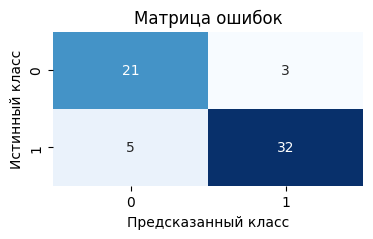

Верность предсказанных значений (accuracy, %): 86.9
Точность предсказанных значений (precision, %): 91.4
Полнота предсказанных значений (recall, %): 86.5
F1-мера (%): 88.9


In [6]:
cm_gnb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")
plt.show()


accuracy_gnb = accuracy_score(y_test, y_pred) * 100
print(f"Верность предсказанных значений (accuracy, %): {accuracy_gnb:.1f}")

precision_gnb = precision_score(y_test, y_pred) * 100
print(f"Точность предсказанных значений (precision, %): {precision_gnb:.1f}")

recall_gnb = recall_score(y_test, y_pred) *100
print(f"Полнота предсказанных значений (recall, %): {recall_gnb:.1f}")

f1_gnb = f1_score(y_test, y_pred) * 100
print(f"F1-мера (%): {f1_gnb:.1f}")


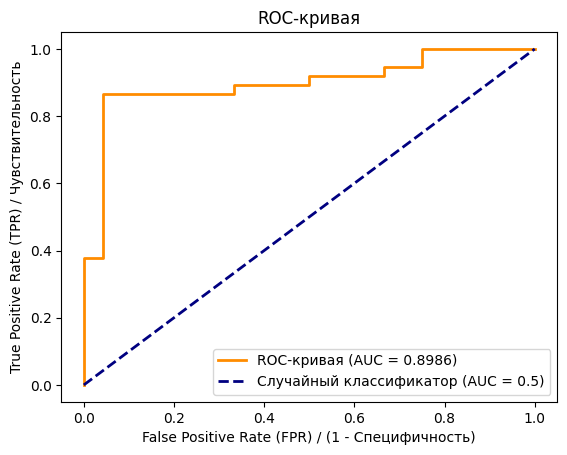

In [7]:
# получение вероятностей принадлежности к классу 1 (больной пациент)
y_probs_gnb = gnb.predict_proba(X_test)[:, 1] # y_test — истинные метки, y_prob — вероятности принадлежности класса 1

fpr, tpr, thresholds = roc_curve(y_test, y_probs_gnb) # расчет FPR, TPR и порогов
roc_auc_gnb = auc(fpr, tpr) # расчет площади под кривой (AUC)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC-кривая (AUC = {roc_auc_gnb:.4f})")
plt.plot([0,1],[0,1], color="navy", lw=2, label="Случайный классификатор (AUC = 0.5)", linestyle="--")
plt.xlabel("False Positive Rate (FPR) / (1 - Специфичность)")
plt.ylabel("True Positive Rate (TPR) / Чувствительность")
plt.title("ROC-кривая")
plt.legend(loc="lower right")
plt.show()

Обучаем и оцениваем модель линейной регрессии

In [8]:
# масштабируем данные для модели линейной регрессии и k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
logreg = LogisticRegression()

y_pred = logreg.fit(X_train_scaled, y_train).predict(X_test_scaled)

print(f"Количество неправильно классифицированных точек из {X_test_scaled.shape[0]} : {(y_test != y_pred).sum()}")


Количество неправильно классифицированных точек из 61 : 12


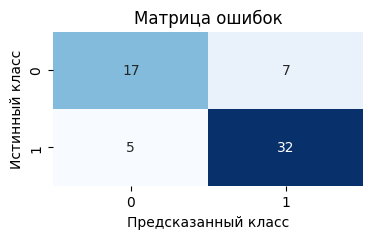

Верность предсказанных значений (accuracy, %): 80.3
Точность предсказанных значений (precision, %): 82.1
Полнота предсказанных значений (recall, %): 86.5
F1-мера (%): 84.2


In [10]:
cm_logreg = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")
plt.show()


accuracy_logreg = accuracy_score(y_test, y_pred) * 100
print(f"Верность предсказанных значений (accuracy, %): {accuracy_logreg:.1f}")

precision_logreg = precision_score(y_test, y_pred) * 100
print(f"Точность предсказанных значений (precision, %): {precision_logreg:.1f}")

recall_logreg = recall_score(y_test, y_pred) *100
print(f"Полнота предсказанных значений (recall, %): {recall_logreg:.1f}")

f1_logreg = f1_score(y_test, y_pred) * 100
print(f"F1-мера (%): {f1_logreg:.1f}")


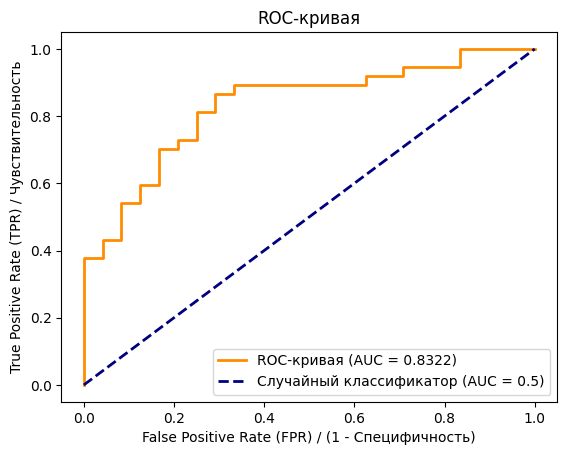

In [11]:
y_probs_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_logreg) 
roc_auc_logreg = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC-кривая (AUC = {roc_auc_logreg:.4f})")
plt.plot([0,1],[0,1], color="navy", lw=2, label="Случайный классификатор (AUC = 0.5)", linestyle="--")
plt.xlabel("False Positive Rate (FPR) / (1 - Специфичность)")
plt.ylabel("True Positive Rate (TPR) / Чувствительность")
plt.title("ROC-кривая")
plt.legend(loc="lower right")
plt.show()

Используем метод k-ближайших соседей (k-NN) и оцениваем его

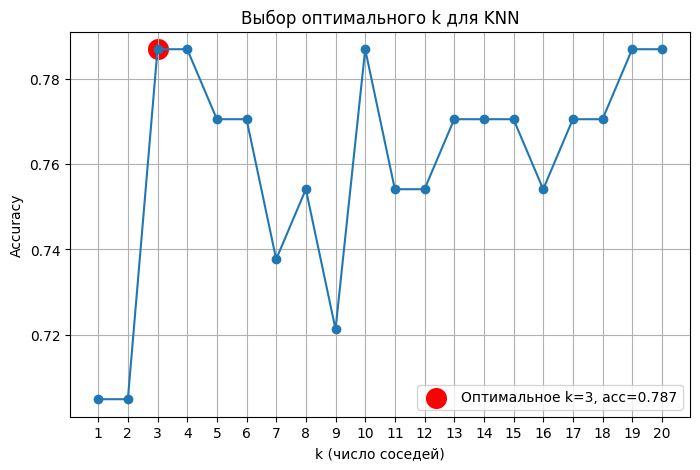

In [12]:
k_values = list(range(1, 21))  # список всех k
acc_series = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    acc_series.append(acc)

# Находим оптимальное k
best_idx = np.argmax(acc_series)  # индекс максимальной точности
best_k = k_values[best_idx]
best_acc = acc_series[best_idx]

# Рисуем график
plt.figure(figsize=(8,5))
plt.plot(k_values, acc_series, marker='o')
plt.xlabel('k (число соседей)')
plt.ylabel('Accuracy')
plt.title('Выбор оптимального k для KNN')
plt.xticks(k_values)
plt.grid(True)
plt.scatter(best_k, best_acc, color='red', s=200, label=f'Оптимальное k={best_k}, acc={best_acc:.3f}')
plt.legend()
plt.show()


In [13]:
knn = KNeighborsClassifier(n_neighbors=best_k)

y_pred = knn.fit(X_train_scaled, y_train).predict(X_test_scaled)

print(f"Количество неправильно классифицированных точек из {X_test_scaled.shape[0]} : {(y_test != y_pred).sum()}")


Количество неправильно классифицированных точек из 61 : 13


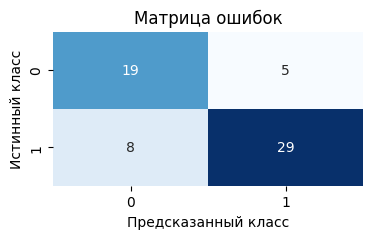

Верность предсказанных значений (accuracy, %): 78.7
Точность предсказанных значений (precision, %): 85.3
Полнота предсказанных значений (recall, %): 78.4
F1-мера (%): 81.7


In [14]:
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.title("Матрица ошибок")
plt.show()


accuracy_knn = accuracy_score(y_test, y_pred) * 100
print(f"Верность предсказанных значений (accuracy, %): {accuracy_knn:.1f}")

precision_knn = precision_score(y_test, y_pred) * 100
print(f"Точность предсказанных значений (precision, %): {precision_knn:.1f}")

recall_knn = recall_score(y_test, y_pred) *100
print(f"Полнота предсказанных значений (recall, %): {recall_knn:.1f}")

f1_knn = f1_score(y_test, y_pred) * 100
print(f"F1-мера (%): {f1_knn:.1f}")


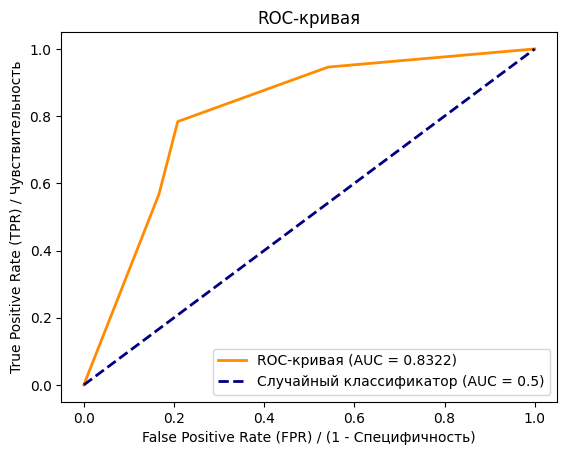

In [15]:
y_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn) 
roc_auc_knn = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC-кривая (AUC = {roc_auc_logreg:.4f})")
plt.plot([0,1],[0,1], color="navy", lw=2, label="Случайный классификатор (AUC = 0.5)", linestyle="--")
plt.xlabel("False Positive Rate (FPR) / (1 - Специфичность)")
plt.ylabel("True Positive Rate (TPR) / Чувствительность")
plt.title("ROC-кривая")
plt.legend(loc="lower right")
plt.show()